In [1]:
# ============================================================
# Notebook setup
# ============================================================

%load_ext autoreload
%autoreload 2

# Control figure size
figsize=(14, 4)

from util import util
import os
import numpy as np
import pandas as pd
data_folder = os.path.join('..', 'data')
file_name = "Data"

# Short term form

While ELO is a good measure to evaluate a team's strength over time, sports are often quite dependent on the recent short term form as well. A team performing well is expected to continue performing well, and vice versa. There could be several reasons. For one, the human aspect of sports could explain it in terms of confidence, rhythm and momentum. We want to implement a way to capture short term form in our model. In this notebook we will focus on a team's goal difference in the last five games.

## Match Rating

By using form statistics such as recent goal difference, it is possible to measure the difference in recent form between the two computing teams. In a game with one well performing team and one poorly performing team, the well performing team is expected to win. We will implement a measure for this by creating a Match Rating. A Match Rating is a way to classify a game into which way the advantage lies before the game. For this notebook, we will use the mentioned goal difference as a simple way to calculate this match rating.

### Load data

In [2]:
data = util.load_data(data_folder, file_name)
data = util.clean_data(data)
data.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AST,HF,AF,HC,AC,HY,AY,HR,AR,Season
0,E0,2005-08-13,Aston Villa,Bolton,2.0,2.0,D,2.0,2.0,D,...,6.0,14.0,16.0,7.0,8.0,0.0,2.0,0.0,0.0,0506
1,E0,2005-08-13,Everton,Man United,0.0,2.0,A,0.0,1.0,A,...,5.0,15.0,14.0,8.0,6.0,3.0,1.0,0.0,0.0,0506
2,E0,2005-08-13,Fulham,Birmingham,0.0,0.0,D,0.0,0.0,D,...,4.0,12.0,13.0,6.0,6.0,1.0,2.0,0.0,0.0,0506
3,E0,2005-08-13,Man City,West Brom,0.0,0.0,D,0.0,0.0,D,...,3.0,13.0,11.0,3.0,6.0,2.0,3.0,0.0,0.0,0506
4,E0,2005-08-13,Middlesbrough,Liverpool,0.0,0.0,D,0.0,0.0,D,...,7.0,17.0,11.0,5.0,0.0,2.0,3.0,1.0,0.0,0506


### Generating the Match Rating

To generate a match rating, we will need to perform two steps. 
- Sum up the goal difference of the last five games for each team.
- Calculate the difference between the two teams' goal difference.
A positive Match Rating will indicate an advantage towards the home team, while a negative Match Rating will indicate an advantage towards the away team.

In [3]:
data = util.add_form_column(data, home_column='FTHG', away_column='FTAG', n=5, operation='Sum')
data['Match Rating'] = data['FTHG_Sum_5'] - data['FTAG_Sum_5']
data

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HC,AC,HY,AY,HR,AR,Season,FTHG_Sum_5,FTAG_Sum_5,Match Rating
0,E0,2005-08-13,Aston Villa,Bolton,2.0,2.0,D,2.0,2.0,D,...,7.0,8.0,0.0,2.0,0.0,0.0,0506,0,0,0
1,E0,2005-08-13,Everton,Man United,0.0,2.0,A,0.0,1.0,A,...,8.0,6.0,3.0,1.0,0.0,0.0,0506,0,0,0
2,E0,2005-08-13,Fulham,Birmingham,0.0,0.0,D,0.0,0.0,D,...,6.0,6.0,1.0,2.0,0.0,0.0,0506,0,0,0
3,E0,2005-08-13,Man City,West Brom,0.0,0.0,D,0.0,0.0,D,...,3.0,6.0,2.0,3.0,0.0,0.0,0506,0,0,0
4,E0,2005-08-13,Middlesbrough,Liverpool,0.0,0.0,D,0.0,0.0,D,...,5.0,0.0,2.0,3.0,1.0,0.0,0506,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38412,E3,2024-04-27,Gillingham,Doncaster,2.0,2.0,D,0.0,2.0,A,...,7.0,5.0,2.0,1.0,0.0,1.0,2324,5,17,-12
38413,E3,2024-04-27,Milton Keynes Dons,Sutton,4.0,4.0,D,2.0,0.0,H,...,3.0,9.0,2.0,2.0,0.0,0.0,2324,16,10,6
38414,E3,2024-04-27,Salford,Harrogate,2.0,2.0,D,2.0,2.0,D,...,2.0,8.0,0.0,2.0,0.0,0.0,2324,4,11,-7
38415,E3,2024-04-27,Swindon,Morecambe,3.0,3.0,D,2.0,2.0,D,...,7.0,7.0,1.0,0.0,0.0,0.0,2324,7,3,4


A thing we need to keep in mind is that summing up the goal difference of the last five games could be innacurate for some games. At the start of the season teams start with a fresh form, and so the first five games should not be included in the calculation, or we will get an effect from the previous season, which we do not want. This will remove many rows, but is necessary for the use of short term form to be accurate.

In [4]:
data = util.remove_the_first_n_matches_in_a_season_for_each_team(data, n=5)
data

number of matches removed:  4414


,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HC,AC,HY,AY,HR,AR,Season,FTHG_Sum_5,FTAG_Sum_5,Match Rating
0,E0,2005-09-17,Aston Villa,Tottenham,1.0,1.0,D,1.0,0.0,H,...,4.0,3.0,1.0,2.0,0.0,0.0,0506,4,4,0
1,E0,2005-09-17,Portsmouth,Birmingham,1.0,1.0,D,1.0,1.0,D,...,7.0,3.0,2.0,0.0,0.0,1.0,0506,4,4,0
2,E0,2005-09-17,Sunderland,West Brom,1.0,1.0,D,1.0,0.0,H,...,1.0,9.0,0.0,3.0,0.0,0.0,0506,2,5,-3
3,E0,2005-09-18,Blackburn,Newcastle,0.0,3.0,A,0.0,0.0,D,...,7.0,2.0,1.0,5.0,0.0,1.0,0506,3,1,2
4,E0,2005-09-18,Man City,Bolton,0.0,1.0,A,0.0,0.0,D,...,7.0,5.0,1.0,1.0,0.0,0.0,0506,7,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33998,E3,2024-04-27,Gillingham,Doncaster,2.0,2.0,D,0.0,2.0,A,...,7.0,5.0,2.0,1.0,0.0,1.0,2324,5,17,-12
33999,E3,2024-04-27,Milton Keynes Dons,Sutton,4.0,4.0,D,2.0,0.0,H,...,3.0,9.0,2.0,2.0,0.0,0.0,2324,16,10,6
34000,E3,2024-04-27,Salford,Harrogate,2.0,2.0,D,2.0,2.0,D,...,2.0,8.0,0.0,2.0,0.0,0.0,2324,4,11,-7
34001,E3,2024-04-27,Swindon,Morecambe,3.0,3.0,D,2.0,2.0,D,...,7.0,7.0,1.0,0.0,0.0,0.0,2324,7,3,4


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34003 entries, 0 to 34002
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Div           34003 non-null  object        
 1   Date          34003 non-null  datetime64[ns]
 2   HomeTeam      34003 non-null  object        
 3   AwayTeam      34003 non-null  object        
 4   FTHG          34003 non-null  float64       
 5   FTAG          34003 non-null  float64       
 6   FTR           34003 non-null  object        
 7   HTHG          34003 non-null  float64       
 8   HTAG          34003 non-null  float64       
 9   HTR           34003 non-null  object        
 10  HS            34003 non-null  float64       
 11  AS            34003 non-null  float64       
 12  HST           34003 non-null  float64       
 13  AST           34003 non-null  float64       
 14  HF            34003 non-null  float64       
 15  AF            34003 non-null  float6

### A look at the distribution

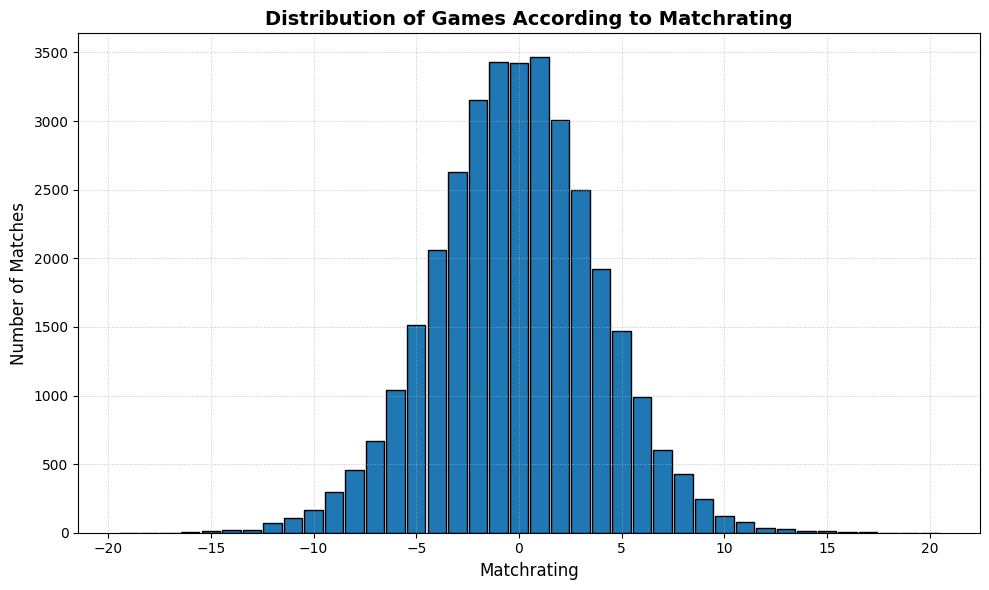

In [6]:
util.plot_histogram(
    data['Match Rating'],
    figsize=(10, 6),
    title="Distribution of Games According to Matchrating",
    xlabel="Matchrating",
    ylabel="Number of Matches",
)

Further, we can look at how home wins, draws and away wins distributed, grouped by the Match Rating. This will give us an idea of how well the Match Rating captures the advantage of a team in a match.

In [7]:
outcome_percentages = util.calculate_outcome_percentages(data)
outcome_percentages

Outcome,Home Wins %,Draw %,Away Wins %,Number of Away Wins,Number of Draws,Number of Home Wins
Match Rating,,,,,,
-19,0.000000,0.000000,100.000000,1,0,0
-18,0.000000,100.000000,0.000000,0,1,0
-16,0.000000,33.333333,66.666667,4,2,0
-15,11.111111,22.222222,66.666667,6,2,1
-14,4.761905,23.809524,71.428571,15,5,1
-13,21.739130,26.086957,52.173913,12,6,5
-12,15.942029,28.985507,55.072464,38,20,11
-11,24.761905,30.476190,44.761905,47,32,26
-10,25.748503,29.341317,44.910180,75,49,43


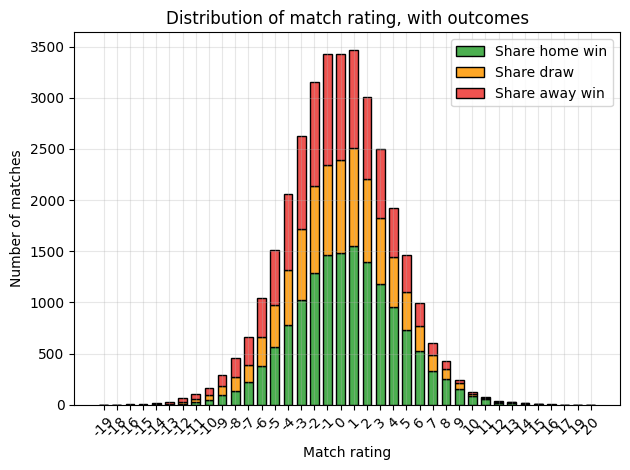

In [8]:
util.plot_grouped_bars(outcome_percentages, figsize=figsize, title='Distribution of match rating, with outcomes', xlabel='Match rating', ylabel='Number of matches')

By this, we can see that Match Rating has an effect in predicting the outcome of a match, as a higher Match Rating has a higher share of home wins, and a negative Match Rating has a higher share of away wins.

### Evaluation

In [9]:
for index, row in data.iterrows():
	matchrating = row["Match Rating"]
	stats = outcome_percentages.loc[matchrating]
	data.at[index, 'Home Prob'] = stats['Home Wins %'] / 100
	data.at[index, 'Draw Prob'] = stats['Draw %'] / 100
	data.at[index, 'Away Prob'] = stats['Away Wins %'] / 100
data = pd.get_dummies(data, columns=["FTR"])


In [10]:
correct, wrong = util.pick_highest_probabilites(data)
print(f'The model correctly predicted {correct} matches and incorrectly predicted {wrong} matches.')
print(f'The model picks {correct/(correct+wrong)*100:.2f}% outcomes correctly.')

The model correctly predicted 15042 matches and incorrectly predicted 18962 matches.
The model picks 44.24% outcomes correctly.


While the effect is not as high as with ELO Rating, there is an effect in using previous form, in the shape of simply goal differences. We will use this insight to engineer a host of features for our model to use. 